## The Battle of Neighborhoods

#### The objective of this project is to have a better understanding of the neighborhoods in Singapore by clustering them into groups with similar characteristics. Together with the information on rent, it is hoped that the results will serve as a guide on the choice of neighborhood to live in.
#### The data on the neighborhoods of Singapore and the corresponding current apartment rental per square meter for a single person are extracted from the Neighbourhood Price Index 2019 by Nestpick and compiled into a csv file. 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import requests

import json 
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Download the data

In [2]:
# The code was removed by Watson Studio for sharing.

,Neighborhood,Median_Rent_sqm ($),Latitude,Longitude
0,Tanjong Pagar,50.78,1.27642,103.843
1,Orchard,46.42,1.30527,103.833
2,Bishan,31.63,1.35191,103.849
3,Ang Mo Kio,31.63,1.36984,103.847
4,Chinatown,50.78,1.27335,103.844


In [3]:
df_Spore = df_data_1
df_Spore.head()

,Neighborhood,Median_Rent_sqm ($),Latitude,Longitude
0,Tanjong Pagar,50.78,1.27642,103.843
1,Orchard,46.42,1.30527,103.833
2,Bishan,31.63,1.35191,103.849
3,Ang Mo Kio,31.63,1.36984,103.847
4,Chinatown,50.78,1.27335,103.844


In [4]:
df_Spore.shape

(71, 4)

### Create a map of Singapore with neighborhoods superimposed on it 

In [5]:
address = 'Singapore'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.3408528, 103.878446863736.


In [6]:
map_Spore = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, rent, neighborhood in zip(df_Spore['Latitude'], df_Spore['Longitude'], df_Spore['Median_Rent_sqm ($)'], df_Spore['Neighborhood']):
    label = '{}, {}'.format(neighborhood, rent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_Spore)  
    
map_Spore

### Explore the neighborhoods using Foursquare API

In [39]:
CLIENT_ID = 'Not sharing'
CLIENT_SECRET = 'Not sharing'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Not sharing
CLIENT_SECRET:Not sharing


### Get the top 100 venues for each neighborhood within a radius from the centroid of 500 meters

In [8]:
LIMIT = 100
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
Spore_venues = getNearbyVenues(names=df_Spore['Neighborhood'],
                                   latitudes=df_Spore['Latitude'],
                                   longitudes=df_Spore['Longitude'])

Tanjong Pagar
Orchard
Bishan
Ang Mo Kio
Chinatown
Clementi New Town
Bedok
Kew Drive
Hougang
Punggol
Toa Payoh
Cairnhill
River Valley
Loyang
Changi Village
Kranji
Woodgrove
Upper East Coast
Eastwood
Serangoon Garden
Upper Thomson
Springleaf
Balestier
Serangoon
Jurong
Macpherson
Braddell
Pasir Panjang, Sentosa Cove
Hong Leong Garden
Queenstown
Tiong Bahru
Alexandra
Commonwealth
Katong
Joo Chiat
Amber Road
Yishun
Sembawang
Ardmore
Bukit Timah
Holland Road
Tanglin
Tampines
Pasir Ris
Middle Road
Golden Mile
Hillview
Dairy Farm
Bukit Panjang
Choa Chu Kang
Geylang
Eunos
Watten Estate
Novena
Thomson
Cecil
Marina
Raffles Place
Boat Quay
High Street
Beach Road (Part)
City Hall
Clarke Quay
Seletar
Telok Blangah
WTC
Harbourfront
Sentosa
Upper Bukit Timah 
Clementi Park
Ulu Pandan


In [10]:
Spore_venues.shape

(2588, 7)

In [11]:
Spore_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tanjong Pagar,1.27642,103.843,Binomio Spanish Restaurante,1.277713,103.842248,Spanish Restaurant
1,Tanjong Pagar,1.27642,103.843,Oasia Downtown Hotel,1.276070,103.844334,Hotel
2,Tanjong Pagar,1.27642,103.843,Teppei Japanese Restaurant,1.276473,103.843809,Japanese Restaurant
3,Tanjong Pagar,1.27642,103.843,DON DON DONKI,1.274742,103.843383,Discount Store
4,Tanjong Pagar,1.27642,103.843,Salmon Samurai,1.275067,103.843730,Sushi Restaurant


In [12]:
Spore_venues.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2583,Ulu Pandan,1.32083,103.776,yo:HA @ulu pandan Gym,1.322451,103.779005,Gym
2584,Ulu Pandan,1.32083,103.776,Bus Stop 12179 (Montview),1.316958,103.776836,Bus Station
2585,Ulu Pandan,1.32083,103.776,Bus Stop 12119 (Police KINS Trg Camp),1.319181,103.772143,Bus Station
2586,Ulu Pandan,1.32083,103.776,Corona Florist,1.325048,103.774843,Garden Center
2587,Ulu Pandan,1.32083,103.776,Bus Stop 12079 (Opp Blk 116),1.323638,103.772607,Bus Station


### Check how many venues were returned for each neighborhood

In [13]:
Spore_cat = Spore_venues.groupby('Neighborhood').count()
Spore_cat.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alexandra,17,17,17,17,17,17
Amber Road,56,56,56,56,56,56
Ang Mo Kio,47,47,47,47,47,47
Ardmore,62,62,62,62,62,62
Balestier,43,43,43,43,43,43


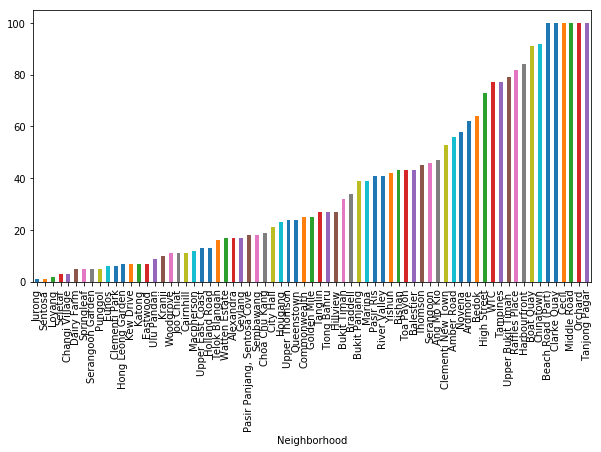

In [37]:
graph = Spore_cat['Venue Category'].sort_values()
graph.plot.bar()
plt.rcParams['figure.figsize'] = [10,5]

In [15]:
print('There are {} uniques categories.'.format(len(Spore_venues['Venue Category'].unique())))

There are 245 uniques categories.


### Analyze each neighborhood by venue category

In [16]:
# one hot encoding
Spore_onehot = pd.get_dummies(Spore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Spore_onehot['Neighborhood'] = Spore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Spore_onehot.columns[-1]] + list(Spore_onehot.columns[:-1])
Spore_onehot = Spore_onehot[fixed_columns]

Spore_onehot.head(5)

,Neighborhood,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zhejiang Restaurant
0,Tanjong Pagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tanjong Pagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tanjong Pagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tanjong Pagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Tanjong Pagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Spore_onehot.shape

(2588, 246)

In [18]:
# Group rows by neighborhood and taking the mean of the frequency of occurrence of each category
Spore_grouped = Spore_onehot.groupby('Neighborhood').mean().reset_index()
Spore_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zhejiang Restaurant
0,Alexandra,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.058824,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,Amber Road,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.053571,0.0,...,0.017857,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.017857,0.0
2,Ang Mo Kio,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.021277,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,Ardmore,0.0,0.064516,0.0,0.0,0.016129,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.016129,0.0,0.0,0.0,0.016129,0.0
4,Balestier,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.046512,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


### Get the top 10 venues per neighborhood

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Spore_grouped['Neighborhood']

for ind in np.arange(Spore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Spore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandra,Chinese Restaurant,Coffee Shop,Bus Station,Hainan Restaurant,Train Station,Basketball Court,Gym,Pool,Asian Restaurant,Park
1,Amber Road,Chinese Restaurant,Supermarket,Café,Asian Restaurant,Hotel,Department Store,Dessert Shop,Convenience Store,Indian Restaurant,Pool Hall
2,Ang Mo Kio,Coffee Shop,Food Court,Bubble Tea Shop,Dessert Shop,Supermarket,Fast Food Restaurant,Sandwich Place,Japanese Restaurant,Asian Restaurant,Snack Place
3,Ardmore,Hotel,American Restaurant,Japanese Restaurant,Burger Joint,Boutique,Hotel Bar,Spa,Chinese Restaurant,Italian Restaurant,French Restaurant
4,Balestier,Chinese Restaurant,Hotel,Food Court,Noodle House,Bakery,Asian Restaurant,Tea Room,General Entertainment,Mediterranean Restaurant,Supermarket


### Use k-means to cluster the neighborhoods

In [21]:
# set number of clusters
kclusters = 10

Spore_grouped_clustering = Spore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Spore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5]

array([9, 1, 1, 1, 9], dtype=int32)

In [22]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Spore_merged = df_Spore

# merge Spore_grouped with df_Spore to add latitude/longitude for each neighborhood
Spore_merged = Spore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Spore_merged.head()

,Neighborhood,Median_Rent_sqm ($),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Tanjong Pagar,50.78,1.27642,103.843,1,Japanese Restaurant,Italian Restaurant,Coffee Shop,Bakery,Café,Ramen Restaurant,Korean Restaurant,Hotel,Food Court,Tapas Restaurant
1,Orchard,46.42,1.30527,103.833,1,Boutique,Hotel,Japanese Restaurant,Asian Restaurant,Cosmetics Shop,Shopping Mall,Sushi Restaurant,Bakery,Bubble Tea Shop,Dessert Shop
2,Bishan,31.63,1.35191,103.849,1,Coffee Shop,Food Court,Chinese Restaurant,Café,Bubble Tea Shop,Japanese Restaurant,Supermarket,Ice Cream Shop,Cosmetics Shop,Gym / Fitness Center
3,Ang Mo Kio,31.63,1.36984,103.847,1,Coffee Shop,Food Court,Bubble Tea Shop,Dessert Shop,Supermarket,Fast Food Restaurant,Sandwich Place,Japanese Restaurant,Asian Restaurant,Snack Place
4,Chinatown,50.78,1.27335,103.844,1,Japanese Restaurant,Coffee Shop,Café,Bakery,Ramen Restaurant,Hotel,Food Court,Soup Place,Gym / Fitness Center,Sushi Restaurant


### Visualize the clusters in the map

In [23]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Spore_merged['Latitude'], Spore_merged['Longitude'], Spore_merged['Neighborhood'], Spore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=10).add_to(map_clusters)
       
map_clusters

### Examine each of the 10 clusters

In [24]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 0, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,32.64,Bus Stop,Chinese Restaurant,High School,Bus Station,Basketball Court,Food Court,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Zhejiang Restaurant
27,42.07,Bar,Bus Station,Indian Restaurant,Pizza Place,Chinese Restaurant,Tapas Restaurant,Sculpture Garden,Café,Grocery Store,Metro Station
70,36.26,Bus Station,Restaurant,Garden Center,French Restaurant,Gym,Gym Pool,Zhejiang Restaurant,Filipino Restaurant,Frozen Yogurt Shop,Fried Chicken Joint


In [25]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 1, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,50.78,Japanese Restaurant,Italian Restaurant,Coffee Shop,Bakery,Café,Ramen Restaurant,Korean Restaurant,Hotel,Food Court,Tapas Restaurant
1,46.42,Boutique,Hotel,Japanese Restaurant,Asian Restaurant,Cosmetics Shop,Shopping Mall,Sushi Restaurant,Bakery,Bubble Tea Shop,Dessert Shop
2,31.63,Coffee Shop,Food Court,Chinese Restaurant,Café,Bubble Tea Shop,Japanese Restaurant,Supermarket,Ice Cream Shop,Cosmetics Shop,Gym / Fitness Center
3,31.63,Coffee Shop,Food Court,Bubble Tea Shop,Dessert Shop,Supermarket,Fast Food Restaurant,Sandwich Place,Japanese Restaurant,Asian Restaurant,Snack Place
4,50.78,Japanese Restaurant,Coffee Shop,Café,Bakery,Ramen Restaurant,Hotel,Food Court,Soup Place,Gym / Fitness Center,Sushi Restaurant
5,42.07,Coffee Shop,Asian Restaurant,Noodle House,Chinese Restaurant,Japanese Restaurant,Food Court,Dessert Shop,Fried Chicken Joint,Dim Sum Restaurant,Shopping Mall
6,33.37,Coffee Shop,Chinese Restaurant,Food Court,Sandwich Place,Japanese Restaurant,Supermarket,Vegetarian / Vegan Restaurant,Noodle House,Fast Food Restaurant,Bakery
8,32.64,Coffee Shop,Indian Restaurant,Gym,Pool,Cosmetics Shop,Pet Store,Sandwich Place,Park,Food & Drink Shop,Café
12,46.42,Japanese Restaurant,Gym,Coffee Shop,Café,Electronics Store,Frozen Yogurt Shop,Thai Restaurant,Deli / Bodega,Movie Theater,Salad Place
15,26.84,Bus Line,Bus Stop,Café,Racetrack,Noodle House,Gym,Lighthouse,Bakery,Go Kart Track,Food Court


In [26]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 2, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,33.37,Bus Station,Zhejiang Restaurant,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand


In [27]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 3, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,26.47,Basketball Court,Asian Restaurant,Zhejiang Restaurant,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck


In [28]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 4, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
67,42.07,Monument / Landmark,Zhejiang Restaurant,Filipino Restaurant,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck


In [29]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 5, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,26.47,Ice Cream Shop,Diner,Café,Zhejiang Restaurant,Filipino Restaurant,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


In [30]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 6, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,28.29,Restaurant,Club House,Gym,Fast Food Restaurant,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck


In [31]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 7, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,32.64,Chinese Restaurant,Fast Food Restaurant,Lottery Retailer,Asian Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Zhejiang Restaurant


In [32]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 8, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,46.42,Hotel,Supermarket,Chinese Restaurant,Deli / Bodega,Kids Store,Filipino Restaurant,Wine Bar,Pub,Fried Chicken Joint,Fast Food Restaurant


In [38]:
Spore_merged.loc[Spore_merged['Cluster Labels'] == 9, Spore_merged.columns[[1] + list(range(5, Spore_merged.shape[1]))]]

,Median_Rent_sqm ($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,33.37,Ice Cream Shop,Soccer Field,Supermarket,Coffee Shop,Dessert Shop,Food Court,Malay Restaurant,Zhejiang Restaurant,Food Stand,Flower Shop
10,37.72,Coffee Shop,Noodle House,Chinese Restaurant,Steakhouse,Snack Place,Food Court,Café,Asian Restaurant,Thai Restaurant,Dessert Shop
18,33.37,Malay Restaurant,Ice Cream Shop,Supermarket,Coffee Shop,Trail,Dessert Shop,Food Court,Zhejiang Restaurant,Fish & Chips Shop,Flower Shop
22,37.72,Chinese Restaurant,Hotel,Food Court,Noodle House,Bakery,Asian Restaurant,Tea Room,General Entertainment,Mediterranean Restaurant,Supermarket
23,37.72,Hostel,Chinese Restaurant,Noodle House,Asian Restaurant,Hotel,Fast Food Restaurant,Dumpling Restaurant,Sandwich Place,Electronics Store,Seafood Restaurant
26,34.82,Chinese Restaurant,Noodle House,Café,Food Court,Hakka Restaurant,Bakery,Thai Restaurant,Asian Restaurant,Japanese Restaurant,Bus Station
29,40.62,Chinese Restaurant,Malay Restaurant,Food Court,Noodle House,Ice Cream Shop,Fish & Chips Shop,Market,Supermarket,Snack Place,Bakery
30,40.62,Chinese Restaurant,Coffee Shop,Noodle House,Café,Hainan Restaurant,Park,Halal Restaurant,Food Court,Bar,Electronics Store
31,40.62,Chinese Restaurant,Coffee Shop,Bus Station,Hainan Restaurant,Train Station,Basketball Court,Gym,Pool,Asian Restaurant,Park
32,40.62,Noodle House,Food Court,Chinese Restaurant,Indian Restaurant,Salad Place,Fried Chicken Joint,Snack Place,Café,Supermarket,Fish & Chips Shop


### Results and Discussion

#### Please refer to the report or presentation.
#### Please also note that the clusters in this notebook (IBM Watson Studio) is slightly different from the one generated in Cognitive Class. The report and presentation are based on the clusters generated in Cognitive Class.